# __Stroke Prediction__


## __Contents:__
> 1. Overview
> 2. Installation
> 3. Read the dataset
> 4. Explore Information
> 5. Cleaning the dataset
>> 1. Handling whitespaces
>> 2. Handling the Missing Values
>> 3. Handling unnecessary Values
>> 4. Handling the Outliers
> 6. Explore Data Analysis
>> 1. Questions & Answers



## __Overview:__

In this project we take the dataset from kaggle [here](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/code?datasetId=1120859&sortBy=voteCount)


# <hr>

## __Installation:__

In [1]:
# !pip install plotly_express
# !pip install pywaffle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pywaffle import Waffle

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# <hr>

## __Read the Dataset:__

In [3]:
# Read Dataset
df = pd.read_csv('data/stroke-data.csv')
df_eda = df.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_eda.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

# <hr>

## __Cleaning the Dataset:__

### Explore the data and the correlations

In [5]:
# plt.figure(figsize = (7,7))
# sns.pairplot(df)

### Handling whitespaces:

In [6]:
# strip whitespaces in columns
df.columns.str.strip()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
# strip whitespaces in values of multiple columns
cols = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
df[cols] = df[cols].apply(lambda x: x.str.strip())

### Handling the Missing Values:

In [8]:
# Check for null values
df_eda.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df_eda.bmi.mean()

28.893236911794673

In [10]:
df_eda.bmi.median()

28.1

In [11]:
# fill null values in bmi column
df_eda.bmi= df_eda.bmi.fillna(df_eda.bmi.mean())

In [12]:
df_eda.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df_eda.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

### Unnecessary Values:

In [14]:
# Round up the age 
df_eda.age = df_eda.age.round().astype('int')

In [15]:
# Delete 'id' column 
df_eda = df_eda.drop('id', axis=1)

### Handling the Outliers:

In [16]:
fig = px.box(df_eda, x="work_type", y="age" , color='hypertension') 
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [17]:
fig = px.box(df_eda, x="smoking_status", y="age" , color='work_type') 
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [18]:
fig = px.box(df_eda, x="gender", y="age" , color='stroke') 
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

> We can see here a weird category in the gender so we will delete this category


In [19]:
# # Drop 'Other' Because only one patient has 'other'
df_eda.drop(df_eda.loc[df_eda['gender']=='Other'].index, inplace=True)

In [20]:
# # now we will handle the outlier
# df_eda= df_eda.loc[df_eda['age']== 1 and df_eda['stroke']== 1].replace(df_eda['stroke']== 0)
# df_eda

In [21]:
df_eda

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [22]:
fig = px.box(df_eda, x="heart_disease", y="age" , color='stroke') 
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

### Adding the categories:

In [23]:
df_eda['bmi_cat'] = pd.cut(df_eda['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df_eda['glucose_cat'] = pd.cut(df_eda['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df_eda['age_cat'] = pd.cut(df_eda['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

# <hr>

## __Explore Data Analysis:__

### Questions & Answers:

#### 1. Does age has impact on strokes?

In [24]:
# Code
age_group = df_eda.groupby(['age' ,'stroke'] , as_index=False)[['stroke']].count()
age_group

,age,stroke
0,0,20
1,1,64
2,1,1
3,2,90
4,3,46
...,...,...
122,80,17
123,81,46
124,81,14
125,82,47


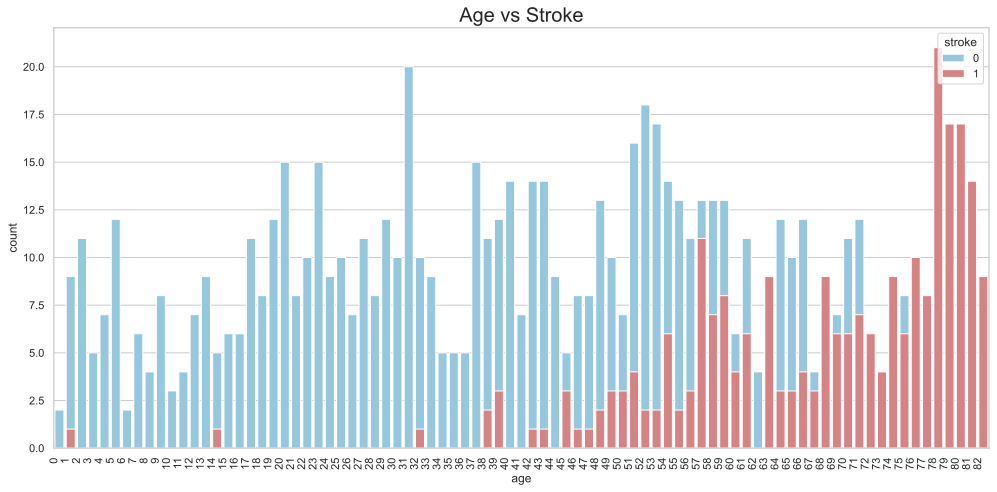

In [25]:
# Visual
plt.figure(figsize = (14,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x= "age" , hue= "stroke" , dodge=False, data= df_eda.head(1000) , palette=['#8BCBE8','#E37678'] );
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.title('Age vs Stroke', size=20);
plt.tight_layout()


<ipython-input-26-5e22699e7e9b>:7: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-26-5e22699e7e9b>:9: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Text(120, 0.043, 'Healthy')

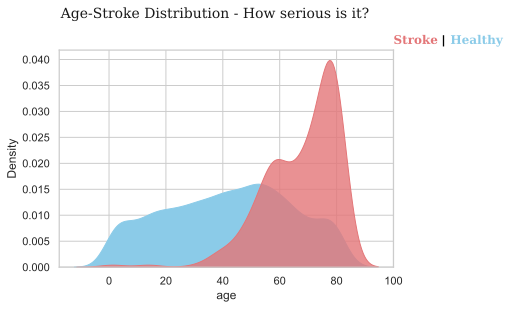

In [26]:
sns.kdeplot(data = df[df['stroke'] == 0], x = 'age', shade = True,  alpha = 1, legend=True, color = '#8BCBE8' );
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age', shade = True,  alpha = 0.8, legend=True, color = '#E37678');
# title
plt.text(-17,0.048,'Age-Stroke Distribution - How serious is it?', {'font':'Serif','color': 'black', 'size':14}, alpha= 0.9)

# legend
plt.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#E37678'})
plt.text(117,0.043, '|', {'color':'black' , 'size':'12', 'weight': 'bold'})
plt.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#8BCBE8'})

#### 2. Does body mass index and glucose levels in a person, propel a stroke?

In [27]:
# Code
bmi_group = df_eda.groupby(['glucose_cat' , 'stroke'] )[['stroke']].count()
bmi_group.head(60) 

stroke
glucose_cat stroke        
Low         0         2316
            1           89
Normal      0         1965
            1           71
High        0          478
            1           71
Very High   0          101
            1           18

##### Glucose Figure

In [28]:
# Visual
#  Visual for glucose and storke 
fig = plt.figure(figsize = (15,5), dpi = 60)

gs = fig.add_gridspec(15,5)
gs.update(wspace = 1, hspace = 0.05)
ax1 = fig.add_subplot() #dumbbell plot

# axes list
axes = [ ax1]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#ffff')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#ffff')

# set x axis invisiable        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_glu = df_eda[df_eda['stroke'] == 1].glucose_cat.value_counts()
healthy_glu = df_eda[df_eda['stroke'] == 0].glucose_cat.value_counts()

# Take the result from the value count in list  and match it with a title for each result 
ax1.hlines( y =['Low', 'Normal', 'High', 'Very High'], xmin = [2316,1966,478,101], 
          xmax = [89,71,71,18], color = 'grey',**{'linewidth':0.5})

# Normal scatter
sns.set_theme(style="white")
sns.scatterplot(y = stroke_glu.index, x = stroke_glu.values, s = stroke_glu.values, color = '#E37678', ax= ax1, alpha = 1);
sns.scatterplot(y = healthy_glu.index, x = healthy_glu.values, s = healthy_glu.values, color = '#8BCBE8', ax= ax1, alpha = 1);

# the x and y axis settings 
ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

# Labels of the result
ax1.set_yticklabels( labels = ['Low', 'Normal', 'High', 'Very High'],fontdict = {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'} , alpha = 0.5)

# Figure Title and conclusion
ax1.text(-1000,4.3, 'Glucose level VS Strokes' ,{'font': 'Serif', 'Size': '20', 'color':'black'})
ax1.text(1800,3.5, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#E37678'})
ax1.text(2051,3.5, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2089,3.5, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#8BCBE8'})
# ax1.text(-1000,3.7, 'Glucose does not have significant impact on strokes, and its unclear strokes are which group effected by strokes.',{'font':'Serif', 'size':'10','color': 'black'})

#low
ax1.text(stroke_glu.values[0] + 30,.05, stroke_glu.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'}) # 89 -> Stroke
ax1.text(healthy_glu.values[0] + -550,0.05, healthy_glu.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})# Healthy people
#Normal
ax1.text(stroke_glu.values[2] + 30,1.05, stroke_glu.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})# 71-> Stroke
ax1.text(healthy_glu.values[2] + 1170,1.05, healthy_glu.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})# Healthy people

# High
ax1.text(stroke_glu.values[1] + 30,2.05, stroke_glu.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})# 71-> Stroke
ax1.text(healthy_glu.values[1]- 1450,2.05, healthy_glu.values[1],{'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'}) # Healthy people

# Very high

fig.show()

##### BMI Figure

In [ ]:
#  Visual for bmicose and storke 

fig = plt.figure(figsize = (15,5), dpi = 60)

gs = fig.add_gridspec(15,5)
gs.update(wspace = 1, hspace = 0.05)
ax1 = fig.add_subplot() #dumbbell plot

# axes list
axes = [ ax1]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#ffff')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#ffff')

# set x axis invisiable        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_bmi = df_eda[df_eda['stroke'] == 1].bmi_cat.value_counts()
healthy_bmi = df_eda[df_eda['stroke'] == 0].bmi_cat.value_counts()

# Take the result from the value count in list  and match it with a title for each result 
ax1.hlines(y = ['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin = [96,115,37,1], 
          xmax = [1797,1495,1159,410], color = 'grey',**{'linewidth':0.5})

# Normal scatter
sns.set_theme(style="white")
sns.scatterplot(y = stroke_bmi.index, x = stroke_bmi.values, s = stroke_bmi.values, color = '#E37678', ax= ax1, alpha = 1);
sns.scatterplot(y = healthy_bmi.index, x = healthy_bmi.values, s = healthy_bmi.values, color = '#8BCBE8', ax= ax1, alpha = 1);

# the x and y axis settings 
ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

# Labels of the result
ax1.set_yticklabels( labels = ['Obesity', 'Overweight', 'Ideal', 'Underweight'],fontdict = {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'},alpha = 0.5)

# Figure Title and conclusion
ax1.text(-1000,4.3, 'bmi level VS Strokes' ,{'font': 'Serif', 'Size': '20','weight':'bold', 'color':'black'})
ax1.text(1800,3.5, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#E37678'})
ax1.text(2051,3.5, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2089,3.5, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#8BCBE8'})
# ax1.text(-750,-0.8, 'High BMI shows signs of possible strokes, and clearly seen that strokes are \nhighest for overweight and obese people, \nwhere as negligible for younger people.', 
#         {'font':'Serif', 'size':'16','color': 'black'})


# Obesity
ax1.text(stroke_bmi.values[0] + 20 , 0.98, stroke_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})
ax1.text(healthy_bmi.values[0] - 300,0, healthy_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})

# Overweighth
ax1.text(stroke_bmi.values[1] + 30,0, stroke_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})
ax1.text(healthy_bmi.values[1] - 275 ,0.98, healthy_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})

#Ideal
ax1.text(stroke_bmi.values[2] + 40,2.0, stroke_bmi.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})
ax1.text(healthy_bmi.values[2] - 275 ,2.0, healthy_bmi.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})

# Underweight
ax1.text(stroke_bmi.values[3] + 20,3.0, stroke_bmi.values[3], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})
ax1.text(healthy_bmi.values[3] - 158 ,3.0, healthy_bmi.values[3], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})


fig.show()

#### 3. Assumption: Smoking can induce Stroke, is it true?

In [29]:
# Code
smoke_group = df_eda.groupby('smoking_status')[['stroke']].sum()
smoke_group

,stroke
smoking_status,
Unknown,47
formerly smoked,70
never smoked,90
smokes,42


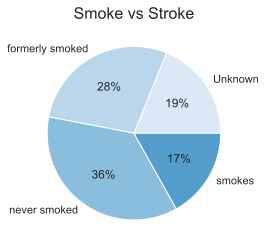

In [30]:
# Visual - pie
colors = sns.color_palette(palette='Blues')
plt.pie(smoke_group["stroke"], labels =smoke_group.index, autopct='%.0f%%', colors=colors);
plt.title('Smoke vs Stroke', size=16);

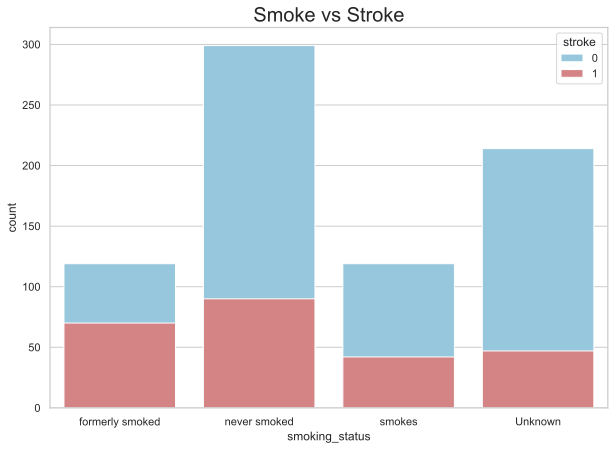

In [31]:
# Visual - bars
plt.figure(figsize = (10,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x= "smoking_status" , hue= "stroke" , dodge=False, data= df_eda.head(1000) , palette=['#8BCBE8','#E37678'] );
plt.title('Smoke vs Stroke', size=20);

##### Big Figure

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-32-cb6b74d17307>:132: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-32-cb6b74d17307>:134: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



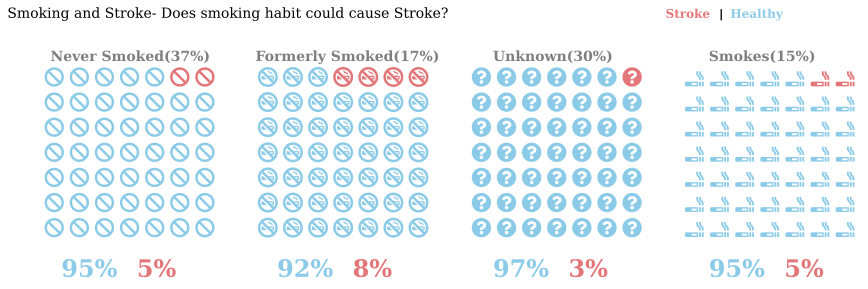

In [32]:
# Visual - icons

smoke = df['smoking_status'].value_counts()
stroke_smoke = df[df['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke = df[df['stroke'] == 0]['smoking_status'].value_counts()

never = smoke.values[0]
unknown =  smoke.values[1]
former = smoke.values[2]
smokes = smoke.values[3]

stroke_never = int(round (stroke_smoke.values[0] / never * 100, 0))
stroke_unknown = int(round( stroke_smoke.values[2]  / unknown *100, 0))
stroke_former = int(round (stroke_smoke.values[1]  / former * 100, 0))
stroke_smokes = int(round( stroke_smoke.values[3]  / smokes *100, 0))

healthy_never = int(round(healthy_smoke.values[0] / never * 100, 0))
healthy_unknown = int(round(healthy_smoke.values[1] / unknown *100, 0))
healthy_former = int(round(healthy_smoke.values[2] / former * 100, 0))
healthy_smokes = int(round(healthy_smoke.values[3]/ smokes *100, 0))

# Percentage
never_per = int(round(never/(never+unknown+former+smokes) * 100, 0))
unknown_per = int(round(unknown/(never+unknown+former+smokes)* 100, 0))
former_per = int(round(former/(never+unknown+former+smokes) * 100, 0))
smokes_per = int(round(smokes/(never+unknown+former+smokes)* 100, 0))


# Figure
fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (15,15),
                 facecolor = '#ffff',dpi = 100,
                 
                 plots = {'141':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_never,healthy_never],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'ban',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '142' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_former,healthy_former],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'smoking-ban',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '143':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_unknown,healthy_unknown],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'question-circle',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '144' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_smokes,healthy_smokes],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'smoking',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                          
                         },
                   
);

# Title + Paragraph
fig.text(0.1, 0.62, 'Smoking and Stroke- Does smoking habit could cause Stroke?', {'font':'Serif', 'size':14, 'color':'black'});

# Percentage healthy
fig.text(0.15, 0.38, '{}%'.format(healthy_never), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,);
fig.text(0.35, 0.38, '{}%'.format(healthy_former), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);
fig.text(0.55, 0.38, '{}%'.format(healthy_unknown), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,);
fig.text(0.75, 0.38, '{}%'.format(healthy_smokes), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);

# Percentage Unhealthy
fig.text(0.22, 0.38, '{}%'.format(stroke_never), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#E37678'},alpha = 1,);
fig.text(0.42, 0.38, '{}%'.format(stroke_former), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#E37678'}, alpha = 1);
fig.text(0.62, 0.38, '{}%'.format(stroke_unknown), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#E37678'},alpha = 1,);
fig.text(0.82, 0.38, '{}%'.format(stroke_smokes), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#E37678'}, alpha = 1);


# Labels
fig.text(0.14, 0.58, 'Never Smoked({}%)'.format(never_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,);
fig.text(0.33, 0.58, "Formerly Smoked({}%)".format(former_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5);
fig.text(0.55, 0.58, 'Unknown({}%)'.format(unknown_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,);
fig.text(0.75, 0.58, "Smokes({}%)".format(smokes_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5);

# Legend
fig.text(0.71,0.62, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#E37678'});
fig.text(0.76,0.62, '|', {'color':'black' , 'size':'12', 'weight': 'bold'});
fig.text(0.77,0.62, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#8BCBE8'},alpha = 1);


#### 4. Assumption: Heart with a Heart Disease is prone to Stroke, is it true?

In [33]:
# Code
heart_group = df_eda.groupby(['heart_disease' ,'stroke'], as_index=False)[['stroke']].count()
heart_group

,heart_disease,stroke
0,0,4631
1,0,202
2,1,229
3,1,47


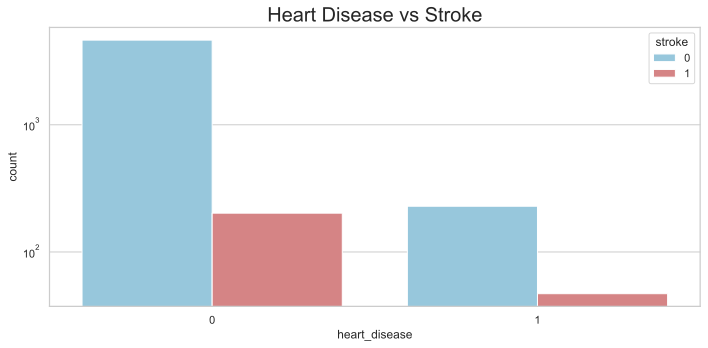

In [34]:
plt.figure(figsize = (10,5))
# Draw with seaborn
sns.countplot(x= "heart_disease" , hue= "stroke" , data= df_eda , palette=['#8BCBE8','#E37678'] );
plt.yscale('log');
plt.title('Heart Disease vs Stroke', size=20);
plt.tight_layout()

##### Big Figure

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-35-1321b5c7d4cb>:76: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-35-1321b5c7d4cb>:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Text(1.04, 0.75, 'Healthy')

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



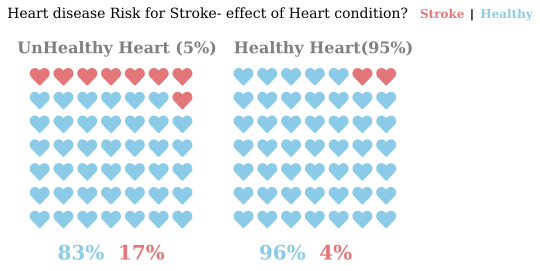

In [35]:

stroke_heart = df_eda[df_eda['stroke'] == 1]['heart_disease'].value_counts()
healthy_heart = df_eda[df_eda['stroke'] == 0]['heart_disease'].value_counts()

no = df_eda['heart_disease'].value_counts().values[0]
yes =  df_eda['heart_disease'].value_counts().values[1]

stroke_no = int(round (stroke_heart.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_heart.values[1] / yes *100, 0))
healthy_no = int(round(healthy_heart.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_heart.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))




fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#ffff',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'heart',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'heart',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
);

# Title + Paragraph
fig.text(0.1, 0.75, 'Heart disease Risk for Stroke- effect of Heart condition?', {'font':'Serif', 'size':14, 'color':'black'})

# Percentage of Healthy
fig.text(0.20, 0.27, '{}%'.format(healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,)
fig.text(0.60, 0.27, '{}%'.format(healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1)

# Percentage of Un-Healthy
fig.text(0.32, 0.27, '{}%'.format(stroke_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#E37678'},alpha = 1,)
fig.text(0.72, 0.27, '{}%'.format(stroke_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#E37678'}, alpha = 1)

# Labels
fig.text(0.12, 0.68, 'UnHealthy Heart ({}%)'.format(yes_per), {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.55, 0.68, "Healthy Heart({}%)".format(no_per), {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)

fig.text(0.92,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#E37678'})
fig.text(1.02,0.75, '|', {'color':'black' , 'size':'12', 'weight': 'bold'})
fig.text(1.04,0.75, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#8BCBE8'},alpha = 1)

 


#### 5. Assumption: Workload results in high blood pressure and that could lead to Stroke, is it true?

In [36]:
# Code
work_group = df_eda.groupby(['work_type' , 'hypertension'],as_index=False)[['stroke']].sum()
work_group

,work_type,hypertension,stroke
0,Govt_job,0,25
1,Govt_job,1,8
2,Never_worked,0,0
3,Private,0,116
4,Private,1,33
5,Self-employed,0,40
6,Self-employed,1,25
7,children,0,2


<Figure size 1080x504 with 0 Axes>

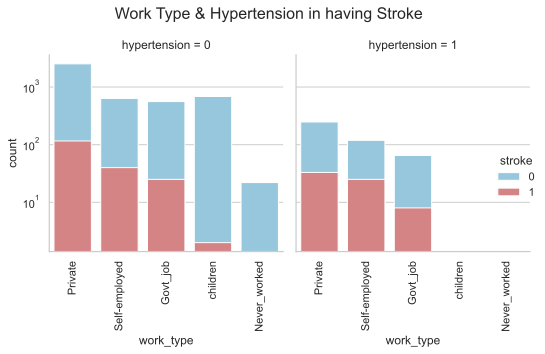

In [37]:
# # Visual - bars
plt.figure(figsize = (15,7))
sns.set_theme(style="whitegrid")
ax = sns.catplot(x= "work_type" ,hue='stroke', col="hypertension", dodge=False, aspect=.7, kind="count", data=df_eda , palette=['#8BCBE8','#E37678']);
ax.set_xticklabels(rotation=90)
plt.yscale('log');
ax.fig.suptitle('Work Type & Hypertension in having Stroke', size=16);
plt.tight_layout()

##### Big Figure

In [38]:
# Visual

work = df_eda['work_type'].value_counts()
stroke_work = df_eda[df_eda['stroke'] == 1]['work_type'].value_counts()
healthy_work = df_eda[df_eda['stroke'] == 0]['work_type'].value_counts()

private = work.values[0]
self =  work.values[1]
child = work.values[2]
gov = work.values[3]
never = work.values[4]

stroke_private = int(round (stroke_work.values[0] / private * 100, 0))
stroke_self = int(round( stroke_work.values[1]  / self *100, 0))
stroke_child = int(round (stroke_work.values[3]  / child * 100, 0))
stroke_gov = int(round( stroke_work.values[2]  / gov *100, 0))
stroke_never = int(round( 0, 0))

healthy_private = int(round(healthy_work.values[0] / private * 100, 0))
healthy_self = int(round(healthy_work.values[1] / self *100, 0))
healthy_child = int(round(healthy_work.values[2] / child * 100, 0))
healthy_gov = int(round(healthy_work.values[3]/ gov *100, 0))
healthy_never = int(round(healthy_work.values[4]/ never *100, 0))

private_per = int(round(private/(private+self+child+gov+never) * 100, 0))
self_per = int(round(self/(private+self+child+gov+never)* 100, 0))
child_per = int(round(child/(private+self+child+gov+never) * 100, 0))
gov_per = int(round(gov/(private+self+child+gov+never)* 100, 0))
never_per = int(round(never/(private+self+child+gov+never)* 100, 0))


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-39-d77b25fd161d>:125: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-39-d77b25fd161d>:127: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



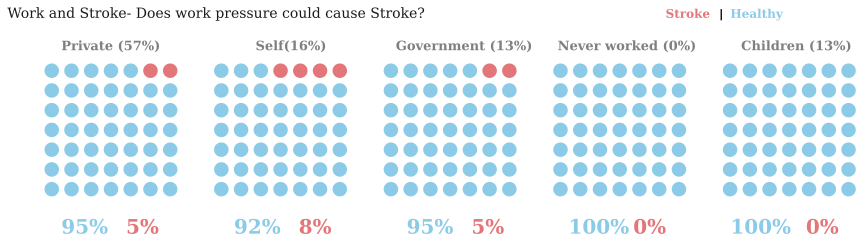

In [39]:
# figure

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (15,15),
                 facecolor = '#ffff',dpi = 100,
                 
                 plots = {'151':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_private,healthy_private],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'circle',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                          },
                          
                          '152' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_self,healthy_self],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '153':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_gov,healthy_gov],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'circle',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                          },
                          
                          '154' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_never,healthy_never],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '155' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_child,healthy_child],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           }
                          
                         },
                   
);

# Title
fig.text(0.1, 0.60, 'Work and Stroke- Does work pressure could cause Stroke?', {'font':'Serif', 'size':14, 'color':'black'},alpha = 0.9)

# Percentage healthy
fig.text(0.15, 0.40, '{}%'.format(healthy_private), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,);
fig.text(0.31, 0.40, '{}%'.format(healthy_self), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);
fig.text(0.47, 0.40, '{}%'.format(healthy_gov), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,);
fig.text(0.62, 0.40, '{}%'.format(healthy_never), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);
fig.text(0.77, 0.40, '{}%'.format(healthy_child), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);

# Percentage Unhealthy
fig.text(0.21, 0.40, '{}%'.format(stroke_private), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#E37678'},alpha = 1,);
fig.text(0.37, 0.40, '{}%'.format(stroke_self), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#E37678'}, alpha = 1);
fig.text(0.53, 0.40, '{}%'.format(stroke_gov), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#E37678'},alpha = 1,);
fig.text(0.68, 0.40, '{}%'.format(stroke_never), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#E37678'}, alpha = 1);
fig.text(0.84, 0.40, '{}%'.format(stroke_child), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#E37678'}, alpha = 1);

# Labels
fig.text(0.15, 0.57, 'Private ({}%)'.format(private_per), {'font':'Serif', 'size':13,'weight':'bold' ,'color':'black'},alpha = 0.5,);
fig.text(0.33, 0.57, "Self({}%)".format(self_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5);
fig.text(0.46, 0.57, 'Government ({}%)'.format(gov_per), {'font':'Serif', 'size':13,'weight':'bold' ,'color':'black'},alpha = 0.5,);
fig.text(0.61, 0.57, "Never worked ({}%)".format(never_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5);
fig.text(0.78, 0.57, "Children ({}%)".format(child_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5) ; 

# Legend
fig.text(0.71,0.6, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#E37678'});
fig.text(0.76,0.6, '|', {'color':'black' , 'size':'12', 'weight': 'bold'});
fig.text(0.77,0.6, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#8BCBE8'},alpha = 1);

#### 6. Assumption: Males are most susceptible to strokes due to high work related stress, is it true

In [40]:
# Code
gender_group = df_eda.groupby('gender')[['stroke']].sum()
gender_group

,stroke
gender,
Female,141
Male,108


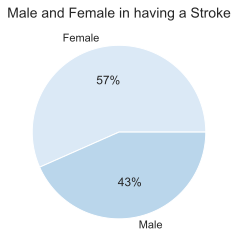

In [41]:
# Visual
colors = sns.color_palette(palette='Blues')
plt.pie(gender_group["stroke"], labels =gender_group.index, autopct='%.0f%%', colors=colors);
plt.title('Male and Female in having a Stroke', size=14);

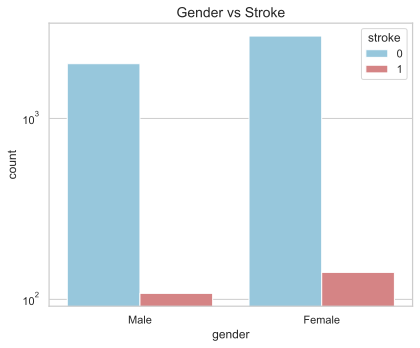

In [42]:
# Visual - bars
plt.figure(figsize = (6,5))
sns.set_theme(style="whitegrid")
sns.countplot(x= "gender" , hue= "stroke" , data= df_eda , palette=['#8BCBE8','#E37678'] );
plt.yscale('log');
plt.title('Gender vs Stroke', size=14);
plt.tight_layout()
